In [6]:
import numpy as np
import pandas as pd

file = '2023_temp_data.csv'
df = pd.read_csv(file, index_col=0, parse_dates=True)
df

,Temperature
Datetime,
2023-01-01 01:00:00,3.5
2023-01-01 02:00:00,3.2
2023-01-01 03:00:00,3.4
2023-01-01 04:00:00,3.2
2023-01-01 05:00:00,1.8
...,...
2023-12-31 19:00:00,9.6
2023-12-31 20:00:00,11.4
2023-12-31 21:00:00,11.0


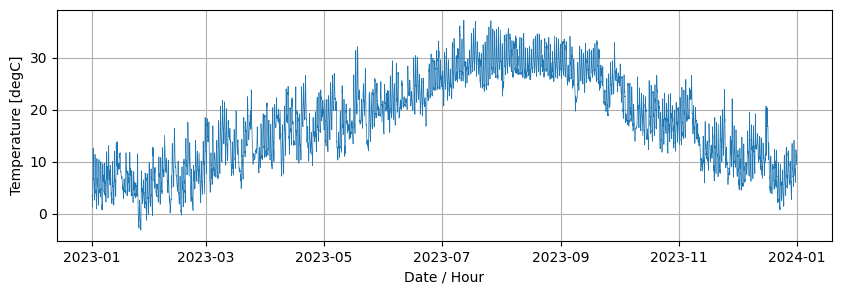

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
ax.plot(df, lw=0.5, c='C0')
#ax.fill_between(df.index, df['Temperature'], color='C1', alpha=0.1)
ax.set_xlabel('Date / Hour')
ax.set_ylabel('Temperature [degC]')
ax.grid()
plt.savefig('temperature_002.png')
plt.show()

In [10]:
N = len(df)
dt = 60 * 60
y = np.array(df['Temperature'])

F = np.fft.fft(y)              # フーリエ変換
freq = np.fft.fftfreq(N, d=dt) # 周波数スケール

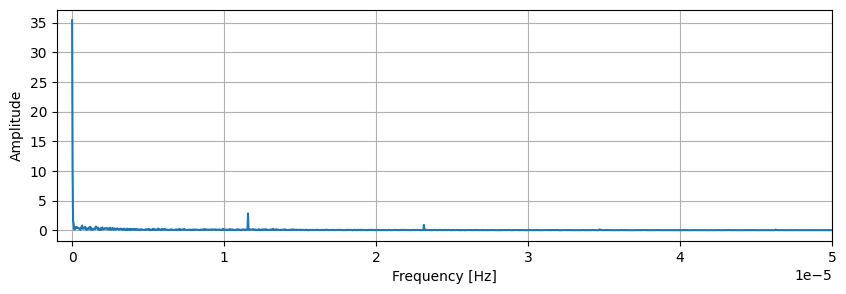

In [24]:
# フーリエ変換の結果を正規化
F_adj = F / (N / 2)

# 振幅スペクトル
Amp = np.abs(F_adj)
fig, ax = plt.subplots()
ax.plot(freq[:N // 2], Amp[:N // 2])
ax.set_xlim(-0.000001, 0.00005)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()